In [10]:
import cv2
import numpy as np
import pandas as pd
import os
from random import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt
#matplotlib inline


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from skimage import *
from sklearn.model_selection import train_test_split

IMG_SIZE = 28
NUMCLASSES = 10

trainfile = r'..\data\MNIST\train.csv'
testfile = r'..\data\MNIST\test.csv'


In [12]:
trainDF = pd.read_csv(trainfile)
testDF = pd.read_csv(testfile)

trainlabels = np.asarray(trainDF.label)
traindigits = np.asarray(trainDF)
traindigits = traindigits[:,1:]

traindigits, valdigits, trainlabels, vallabels = train_test_split(traindigits, trainlabels, test_size=0.2, random_state=42)

testdigits = np.asarray(testDF)

trainDF.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def digit(arr):
    return arr.reshape(IMG_SIZE, IMG_SIZE)

def make_labels(label):
    labels = np.zeros([NUMCLASSES],np.uint8)
    labels[label] = 1
    return labels
    
def train_data_with_label():
    train_images = []
    for i in range(traindigits.shape[0]):
        img = digit(traindigits[i,:])
        train_images.append([img, make_labels(trainlabels[i])])
    #shuffle(train_images)
    return train_images

def validation_data_with_label():
    validation_images = []
    for i in range(valdigits.shape[0]):
        img = digit(valdigits[i,:])
        validation_images.append([img, make_labels(vallabels[i])])
    #shuffle(validation_images)
    return validation_images
    

In [14]:
make_labels(7)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)

In [15]:
training_images = train_data_with_label()
validation_images = validation_data_with_label()

print((np.array(training_images)).shape)
print((np.array(validation_images)).shape)


(33600, 2)
(8400, 2)


C:\Users\banerji\AppData\Local\Temp\ipykernel_10380\1039818463.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print((np.array(training_images)).shape)
C:\Users\banerji\AppData\Local\Temp\ipykernel_10380\1039818463.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print((np.array(validation_images)).shape)


In [16]:
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
tr_lbl_data = np.array([i[1] for i in training_images])
val_img_data = np.array([i[0] for i in validation_images]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
val_lbl_data = np.array([i[1] for i in validation_images])


In [21]:
model = Sequential()

model.add(InputLayer(input_shape=[IMG_SIZE,IMG_SIZE,1])) #keras will internally add batch dimension

model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.7))
model.add(Conv2D(filters=64,kernel_size=5,strides=1,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2,padding='same'))
model.add(Dropout(0.7))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUMCLASSES,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [22]:
#Training
history = model.fit(x=tr_img_data,y=tr_lbl_data,epochs=100,batch_size=700,validation_data=(val_img_data,val_lbl_data),verbose=1)
model.save_weights("mymodel.h5")

Epoch 1/100
48/48 [==============================] - 22s 459ms/step - loss: 13.2924 - accuracy: 0.1090 - val_loss: 2.3023 - val_accuracy: 0.1082
Epoch 2/100
48/48 [==============================] - 25s 519ms/step - loss: 2.3028 - accuracy: 0.1117 - val_loss: 2.3019 - val_accuracy: 0.1082
Epoch 3/100
48/48 [==============================] - 26s 532ms/step - loss: 2.3031 - accuracy: 0.1115 - val_loss: 2.3016 - val_accuracy: 0.1082
Epoch 4/100
48/48 [==============================] - 25s 514ms/step - loss: 2.3012 - accuracy: 0.1120 - val_loss: 2.3014 - val_accuracy: 0.1082
Epoch 5/100
48/48 [==============================] - 24s 498ms/step - loss: 2.2929 - accuracy: 0.1121 - val_loss: 2.2472 - val_accuracy: 0.1082
Epoch 6/100
48/48 [==============================] - 24s 500ms/step - loss: 2.2494 - accuracy: 0.1188 - val_loss: 2.2133 - val_accuracy: 0.1938
Epoch 7/100
48/48 [==============================] - 27s 553ms/step - loss: 2.2172 - accuracy: 0.1514 - val_loss: 2.2096 - val_accuracy

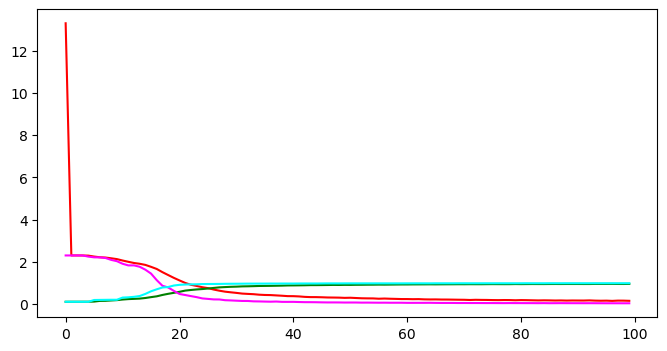

In [23]:
fig = plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['accuracy'],color='green')
plt.plot(history.history['val_loss'],color='magenta')
plt.plot(history.history['val_accuracy'],color='cyan')
plt.show()

In [24]:
model.load_weights('mymodel.h5')

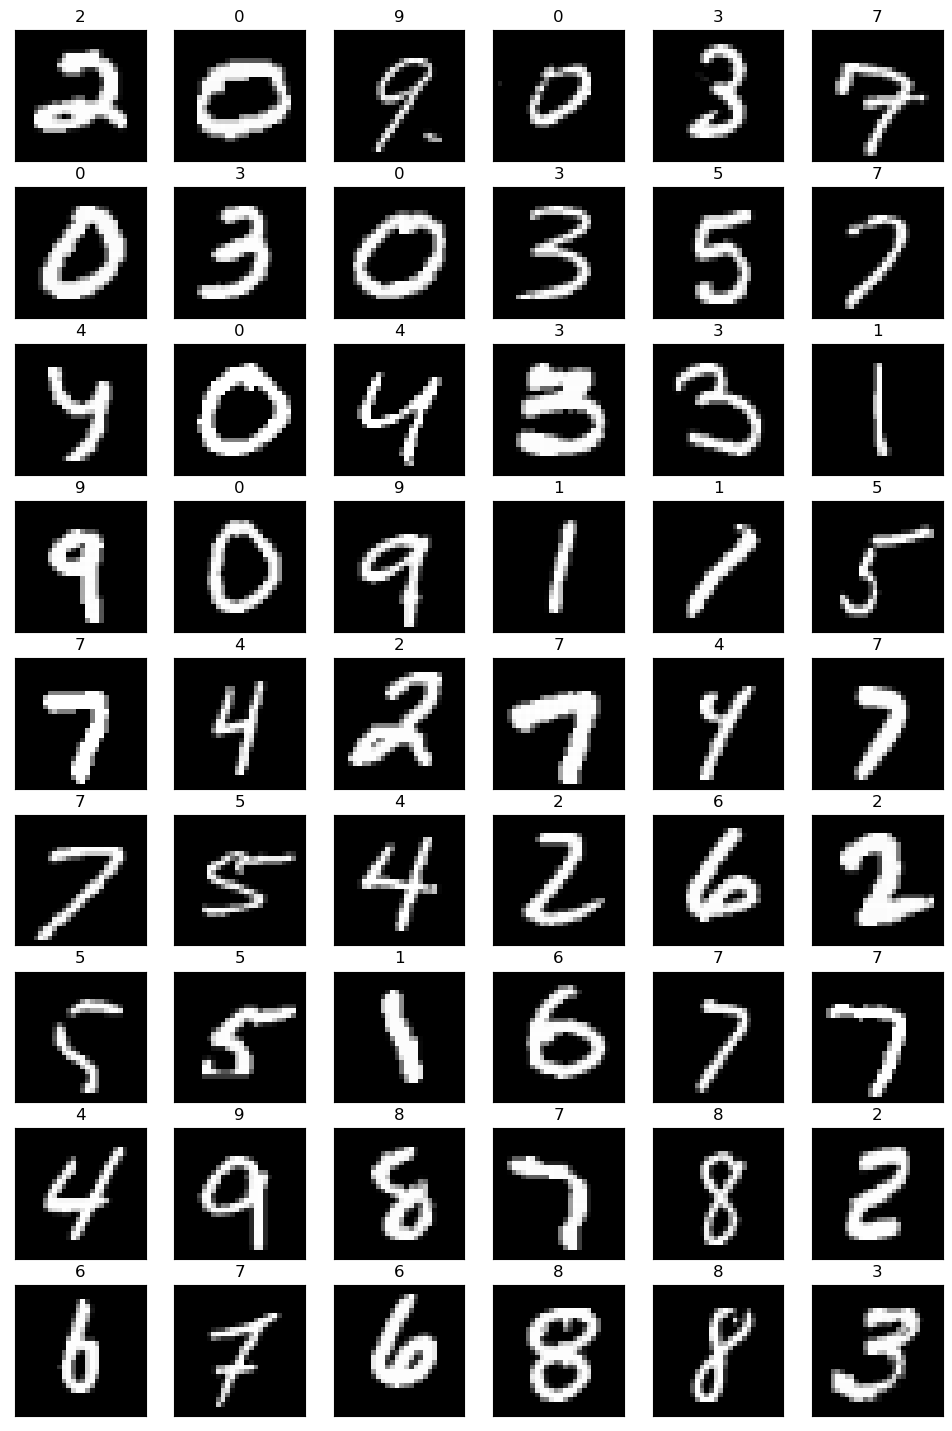

In [25]:
#Testing

fig = plt.figure(figsize=(12, 18))
for i in range(testdigits.shape[0]):
    y = fig.add_subplot(9, 6, i+1)
    img = digit(testdigits[i,:])
    img = img.reshape(1,IMG_SIZE,IMG_SIZE,1)
    model_out = model.predict(img)
    #print(np.uint16(model_out*100)/100)
    str_label= str(np.argmax(model_out))
    
    y.imshow(digit(testdigits[i,:]),cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    if i==53:
        break;
plt.show()


In [26]:
class Chromosome:

    #Constructor
    def __init__(self,img):
        self.genes = np.copy(img)
        self.inputsize = (img.shape[0],img.shape[1])
                
    #Mutate
    def mutate(self,fraction=.01):
        numsites = np.uint16(self.inputsize[0]*self.inputsize[1]*fraction)
        rows = np.random.randint(self.inputsize[0],size=numsites)
        cols = np.random.randint(self.inputsize[1],size=numsites)
        for i in range(numsites):
            self.genes[rows[i],cols[i]] = np.random.randint(256)    
    
    #Get fitness(model,classnum):
    def getFitness(self, model,clussnum=2):
        img = self.genes.reshape(1,IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict(img)
        model_out = model_out.flatten()
        return model_out[classnum]
    
    # Reproduce
    def mate(self, other):
        mask = np.uint8(np.random.randint(2,size=self.inputsize))
        temp = self.genes*mask + other.genes*(1-mask)
        offspring = Chromosome(temp)
        return offspring
        
    # Return image
    def getImage(self):
        return self.genes
        
    

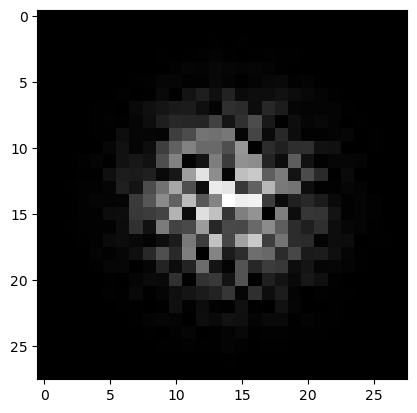

In [27]:
def getFitness_genepool(arr_of_chromosomes, model, classnum=2):
    arr_of_images = []
    height = arr_of_chromosomes[0].inputsize[0]
    width = arr_of_chromosomes[0].inputsize[1]
    for i in range(len(arr_of_chromosomes)):
        arr_of_images.append(arr_of_chromosomes[i].getImage())
    img_tensor = np.reshape(arr_of_images,[len(arr_of_chromosomes),height,width,1])
    preds = model.predict(img_tensor)
    fitness_values = np.array(preds[:,classnum])
    return fitness_values

### Gaussian Mask
size = [28,28]
sigma = 1
sizex = size[0]//2
sizey = size[1]//2
x, y = np.mgrid[-sizex: sizex + 1, -sizey: sizey + 1]
gm = np.exp(- (x ** 2/float(sizex) + y ** 2 / float(sizey)) / (2 * sigma ** 2))
gm = gm / np.sqrt(2 * np.pi * sigma)
gm = gm / np.sum(gm)
gm = gm / np.amax(gm)
    
def digitLike(size=(28,28)):
    r = np.random.randint(255,size=gm.shape)
#     mask = np.uint8(np.random.randint(4,size=g.shape)) # Generate random numbers 0-3
#     mask = np.uint8(mask==0) # mask has only 25% pixels lit
#     r = r * mask
    out = np.uint8(gm*r)
    if out.shape==size:
        return out
    else:
        return out[:size[0],:size[1]]

plt.imshow(digitLike(size=(28,28)),'gray')

In [28]:
import time
poolsize = 5000
generations = 1000
imsize = (28,28)
mut_fraction = 0.1

digits = np.zeros([imsize[0],imsize[1],10],'uint8')
for classnum in range(10):
    delta = 0


    bestValue = Chromosome(digitLike(imsize))
    #plt.imshow(bestValue.getImage(),'gray')
    #classnum = 6

    bestones = []

    genepool = []
    for p in range(poolsize):
        genepool.append(Chromosome(digitLike(imsize)))


    for g in range(generations):
        offsprings = []               
        pairings = np.array(range(poolsize))
        np.random.shuffle(pairings)
        offspringCount = 0
        for pair in range(0,poolsize,2):
            offspringCount = offspringCount + 1;
            offsprings.append(genepool[pairings[pair]].mate(genepool[pairings[pair + 1]]))

        oldBest = genepool[0].getFitness(model,classnum)
        newGenepool = genepool + offsprings #concatenate
        #fitnessValues = np.zeros(len(newGenepool))
        #for x in range(len(newGenepool)):
        #    fitnessValues[x] = newGenepool[x].getFitness(model,classnum)
        fitnessValues = getFitness_genepool(newGenepool, model, classnum)
        index = np.argsort(fitnessValues)
        index = index[::-1]
        genepool = [newGenepool[i] for i in index[:poolsize]]
        #plt.imshow(genepool[0].getImage())
        delta = genepool[0].getFitness(model,classnum) - oldBest
        if bestValue.getFitness(model,classnum) < genepool[0].getFitness(model,classnum):
            bestValue = genepool[0]
        bestScore = bestValue.getFitness(model,classnum)
        line = 'Class ' + str(classnum) + ' generation ' + str(g+1) +' best: ' + str(bestScore)
        print(line,end='\r')
        time.sleep(0.01)
        bestones.append(bestValue.getImage())
        digits[:,:,classnum] = bestValue.getImage()

        if 1 - bestScore < 0.00001:
            break
        if delta == 0:
            to_mutate = np.random.randint(poolsize,size=np.uint8(np.ceil(poolsize*mut_fraction)))
            for x in to_mutate:
                genepool[x].mutate()

                   
                    
                    
                    

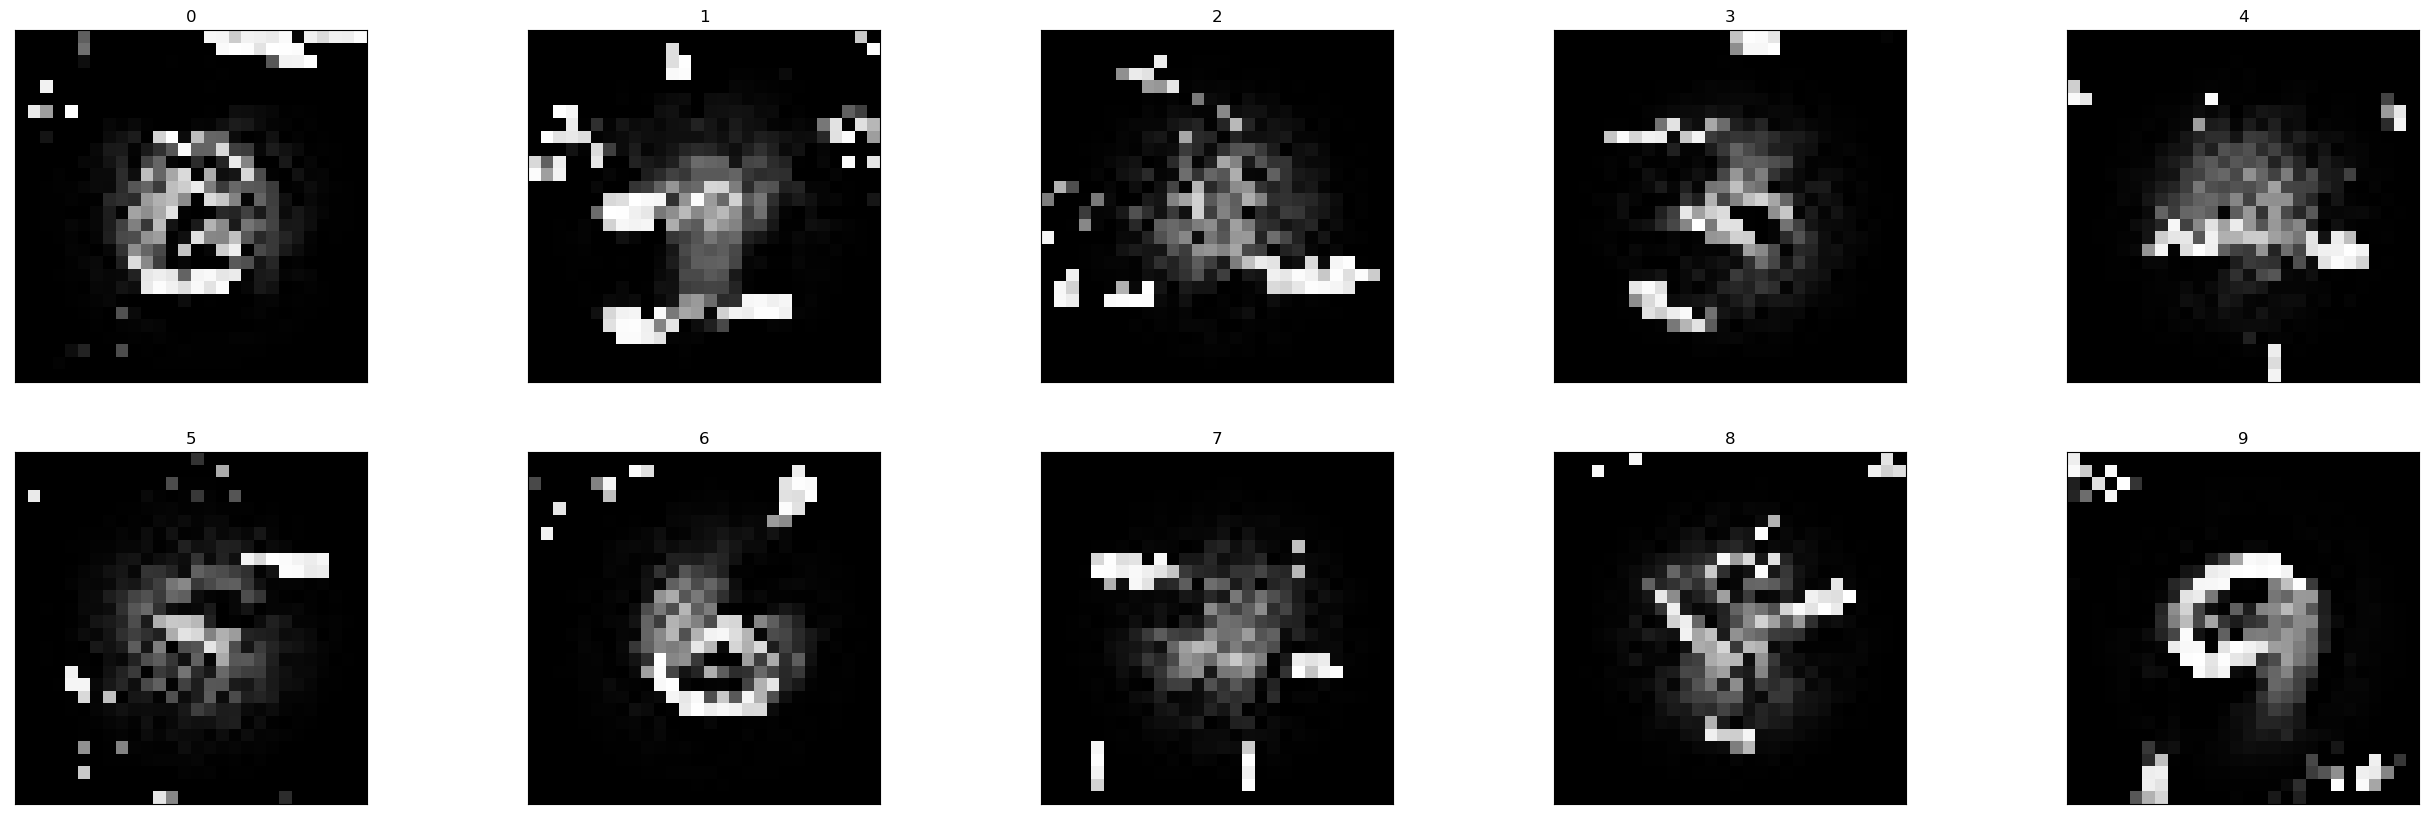

In [29]:
#Testing

fig = plt.figure(figsize=(32, 32))
cols = 5
rows = np.uint16(np.ceil(len(digits) / cols))
for i in range(digits.shape[2]):
    y = fig.add_subplot(rows, cols, i+1)
    img = digits[:,:,i]
    
    y.imshow(img,cmap='gray')
    plt.title(str(i))
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
